In [194]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Polygon, Point

data_dir = "./dataset/"
img_dir = "./img/"

# Funzioni utili

In [150]:
# Funzione che modifica i nomi delle colonne di "da_modificare" con i nomi delle corrispondenti colonne di "base"
def make_consistent(base, da_modificare):
    for i in range(min(base.columns.size, da_modificare.columns.size)):
        # check if columns name are equal
        if(base.columns[i] != da_modificare.columns[i]):
            # rename column
            da_modificare.rename(columns = {da_modificare.columns[i]:base.columns[i]}, inplace=True)

# Funzione che verifica che due dataset abbiano lo stesso numero di colonne e con gli stessi nomi 
def check_same_shape(a, b):
    size = min(a.columns.size, b.columns.size)
    return np.all(a.columns[:size] == b.columns[:size])

# restituisce una serie di sigle delle province della regione 
def get_province(df_province, regione):
    return df_province[df_province.regione == regione].sigla

# restituisce
def get_scuole(province, df_scuole):
    return df_scuole[df_scuole.SIGLAPROVINCIA.isin(province)]

# Import DataSet

In [222]:
# ***************************** #
# ********* ELENCO ************ # 
# ***************************** #

elenco = pd.read_csv(data_dir + "elenco_scuole_italia.csv")

# ***************************** #
# ********* PROVINCE ********** # 
# ***************************** #


province = pd.read_csv(data_dir + "province.csv", encoding='latin-1')
regioni = province.regione.unique()

# ***************************** #
# ********** AMBIENTE ********* # 
# ***************************** #

a_i_1718 = pd.read_csv(data_dir + "ambiente_italia_1718.csv")
a_i_1819 = pd.read_csv(data_dir + "ambiente_italia_1819.csv")
a_i_2021 = pd.read_csv(data_dir + "ambiente_italia_2021.csv")
a_i_2122 = pd.read_csv(data_dir + "ambiente_italia_2122.csv")

# MODIFICHE
# drop last column in ambiente dataframes ( sembra poco rilevante )
a_i_1718.drop(columns=['AREAALTREMOTIVAZIONI'], inplace=True)
a_i_1819.drop(columns=['AREAALTREMOTIVAZIONI'])
a_i_2021.drop(columns=['ALTRECRITICITASPECIFICHE'], inplace=True)
a_i_2122.drop(columns=['ALTRECRITICITASPECIFICHE'], inplace=True)
# drop column in position 12 ( non coincidono tra annate e sempra poco rilevante )
a_i_1718.drop(columns=[a_i_1718.columns[12]], inplace=True)
a_i_1819.drop(columns=[a_i_1819.columns[12]], inplace=True)
a_i_2021.drop(columns=[a_i_2021.columns[12]], inplace=True)
a_i_2122.drop(columns=[a_i_2122.columns[12]], inplace=True)

# modifica nomi degli attributi 
make_consistent(a_i_2021, a_i_1819)
make_consistent(a_i_2021, a_i_1718)

# ***************************** #
# ****** RAGGIUNGIBILITÀ ****** # 
# ***************************** #
t_i_1516 = pd.read_csv(data_dir + "trasporti_italia_1516.csv")
t_i_1718 = pd.read_csv(data_dir + "trasporti_italia_1718.csv")
t_i_1819 = pd.read_csv(data_dir + "trasporti_italia_1819.csv")
t_i_2021 = pd.read_csv(data_dir + "trasporti_italia_2021.csv")
t_i_2122 = pd.read_csv(data_dir + "trasporti_italia_2122.csv")

# MODIFICHE
# drop last column ( "ALTRO", difficile da analizzare)
t_i_1516.drop(columns=[t_i_1516.columns[t_i_1516.columns.size - 1]], inplace=True)
t_i_1718.drop(columns=[t_i_1718.columns[t_i_1718.columns.size - 1]], inplace=True)
t_i_1819.drop(columns=[t_i_1819.columns[t_i_1819.columns.size - 1]], inplace=True)
t_i_2021.drop(columns=[t_i_2021.columns[t_i_2021.columns.size - 1]], inplace=True)
t_i_2122.drop(columns=[t_i_2122.columns[t_i_2122.columns.size - 1]], inplace=True)
# le annate 2121 e 2122 hanno in più una colonna alla fine relativa alla presenza di piste ciclabili

# modifica nomi degli attributi 
make_consistent(t_i_2021, t_i_1516)
make_consistent(t_i_2021, t_i_1718)
make_consistent(t_i_2021, t_i_1819)

# ***************************** #
# * BARRIERE ARCHITETTONICHE ** # 
# ***************************** #
ba_i_1718 = pd.read_csv(data_dir + "barriere_architettoniche_italia_1718.csv")
ba_i_1819 = pd.read_csv(data_dir + "barriere_architettoniche_italia_1819.csv")
ba_i_2021 = pd.read_csv(data_dir + "barriere_architettoniche_italia_2021.csv")
ba_i_2122 = pd.read_csv(data_dir + "barriere_architettoniche_italia_2122.csv")

# MODIFICHE
# drop last column ( "ALTRO", difficile da analizzare)
ba_i_1718.drop(columns=[ba_i_1718.columns[ba_i_1718.columns.size - 1]], inplace=True)
ba_i_1819.drop(columns=[ba_i_1819.columns[ba_i_1819.columns.size - 1]], inplace=True)
ba_i_2021.drop(columns=[ba_i_2021.columns[ba_i_2021.columns.size - 1]], inplace=True)
ba_i_2122.drop(columns=[ba_i_2122.columns[ba_i_2122.columns.size - 1]], inplace=True)

# modifica nomi degli attributi 
make_consistent(ba_i_2021, ba_i_1819)
make_consistent(ba_i_2021, ba_i_1718)

print('SCHEMA DATASET AMBIENTE', a_i_1819.columns)
print("\n\n\n")
print('SCHEMA DATASET RAGGIUNGIBILITÀ', t_i_1819.columns)
print("\n\n\n")
print('SCHEMA DATASET BARRIERE ARCHITETTONICHE', ba_i_1819.columns)
print("\n\n\n")
print('SCHEMA ELENCO SCUOLE', elenco.columns)
print("\n\n\n")
print('SCHEMA province', province.columns)

SCHEMA DATASET AMBIENTE Index(['ANNOSCOLASTICO', 'CODICESCUOLA', 'CODICEEDIFICIO',
       'CONTESTOSENZADISTURBI', 'VICINANZADISCARICA',
       'VICINANZAINDUSTRIEINQUINANTI', 'VICINANZAACQUEINQUINANTI',
       'VICINANZAFONTIINQUINAMENTOATMOSFERICO',
       'VICINANZAFONTIINQUINAMENTOACUSTICO',
       'VICINANZASORGENTIRADIAZIONIELETTROMAGNETICHE', 'VICINANZACIMITERI',
       'VICINANZAALTRIDISTURBI', 'ASSENZAPIAZZOLAADEGUATA', 'AREANONRECINTATA',
       'PRESENZAGRANDETRAFFICO', 'PRESENZATRANSITOFERROVIARIO',
       'PREESISTENZEINDUSTRIALIABBANDONATE', 'ZONAURBANADEGRADATA',
       'VICINANZAINDUSTRIEARISCHIO', 'AREAALTREMOTIVAZIONI'],
      dtype='object')




SCHEMA DATASET RAGGIUNGIBILITÀ Index(['ANNOSCOLASTICO', 'CODICESCUOLA', 'CODICEEDIFICIO', 'SCUOLABUS',
       'TRASPORTIPUBBLICIURBANI', 'TRASPORTIPUBBLICIINTERURBANI',
       'TRASPORTIFERROVIARI', 'MEZZIPRIVATI', 'TRASPORTODISABILI'],
      dtype='object')




SCHEMA DATASET BARRIERE ARCHITETTONICHE Index(['ANNOSCOLASTICO',

### Elenchi tipo scuole

In [172]:
licei = ['PC', 'PL', 'PS', 'SL']
istituti_tecnici = ['TA', 'TB', 'TD', 'TE', 'TF', 'TH', 'TL', 'TN']
istituti_professionali = ['RA', 'RB', 'RC', 'RE', 'RF', 'RH', 'RI', 'RM', 'RN', 'RS', 'RT', 'RV']
area_artistica = ['SD', 'SM', 'SN', 'SR', 'ST']
media = ['MM']
elementari = ['EE']
istituto_comprensivo = ['IC']
superiori = ['IS']
scuola_materna = ['AA']
magistrali = ['PM', 'PQ']
altri = ['VC', 'VE']

regioni

array(['Sicilia', 'Piemonte', 'Marche', "Valle d'Aosta", 'Toscana',
       'Campania', 'Puglia', 'Veneto', 'Lombardia', 'Emilia-Romagna',
       'Trentino-Alto Adige', 'Sardegna', 'Molise', 'Calabria', 'Abruzzo',
       'Lazio', 'Liguria', 'Friuli-Venezia Giulia', 'Basilicata',
       'Umbria'], dtype=object)

In [192]:
province_lombardia = get_province(province, 'Puglia')
cs_lombardia = get_scuole(province_lombardia, elenco).CODICESCUOLA
cs_lombardia = cs_lombardia.to_numpy()


licei_lombardia = [x for x in cs_lombardia if x[2:4] in licei]

servizi_igienici = ba_i_2122[ba_i_2122.CODICESCUOLA.isin(licei_lombardia)].SERVIZIIGIENICISPECIFICINORMADISABILI == 'SI'
servizi_igienici[servizi_igienici].size / len(licei_lombardia) * 100

53.95348837209303

# GeoPandas

In [264]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

<AxesSubplot: >

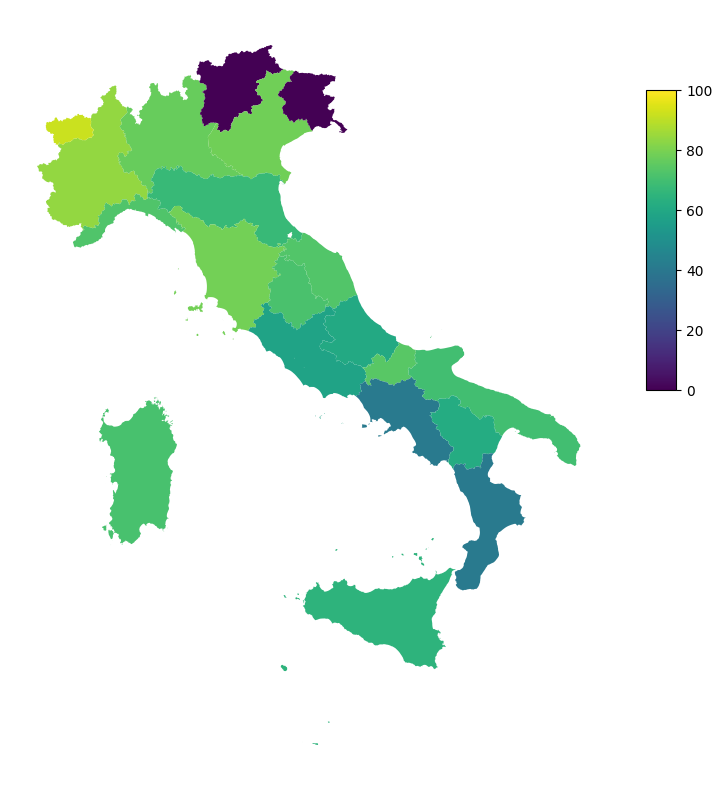

In [281]:
italy = world[world.name == 'Italy']

regioni = gpd.read_file(filename=(data_dir + 'regioni_shape/regioni.shp'))

def percentuale_servizi_igienici_disabili(regione):
    prov = province[province.regione == regione].sigla
    scuole = elenco[elenco.SIGLAPROVINCIA.isin(prov)].CODICESCUOLA
    if(len(scuole) == 0): return 0
    servizi_igienici = ba_i_2122[ba_i_2122.CODICESCUOLA.isin(scuole)].SERVIZIIGIENICISPECIFICINORMADISABILI
    servizi_igienici = servizi_igienici == 'SI'
    return servizi_igienici[servizi_igienici].size / len(scuole) * 100

#regioni['SERVIZI_IGIENICI'] = percentuale_servizi_igienici_disabili('Lombardia')

regioni['SERVIZI_IGIENICI'] = regioni.DEN_REG.apply(lambda x: percentuale_servizi_igienici_disabili(x))

fig, ax = plt.subplots(1, figsize=(10, 10))
ax.set_axis_off()
cax = fig.add_axes([0.85, 0.5, 0.03, 0.3])
cmap = plt.cm.viridis
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=0, vmax=100))
cb = fig.colorbar(sm, cax=cax)

regioni.plot(column='SERVIZI_IGIENICI', vmin=0, vmax=100, cmap=cmap, ax=ax)
# regioni.plot(edgecolor='white', linewidth=1, figsize=(10, 10))
# italy.plot(edgecolor='black', linewidth=1)